<a href="https://colab.research.google.com/github/Santosh344/RetaildataAnalysis/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing liberries... 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#fb prophet imports...
#fb prophet imports..... 
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import (plot_plotly, 
                            plot_components_plotly,
                            plot_forecast_component)

#should be version 0.6+
fbprophet.__version__

'0.7.1'

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
#importing data...
#df = pd.read_csv('C:/Users/Admin/Desktop/thesis/train.csv')

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2.0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3.0,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
#dropping unwanted row....
df.drop(['Row ID','Customer ID','Customer Name','Product ID','Product Name'], axis = 1, inplace = True)

In [9]:
df = df.sort_values('Order Date')
df = df.groupby('Order Date')['Sales'].sum().reset_index()
df.head()

,Order Date,Sales
0,1/1/2018,1481.828
1,1/10/2015,4.710
2,1/10/2016,1158.414
3,1/10/2017,781.414
4,1/10/2018,2978.466


In [10]:
df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
df = df[:int(df.shape[0])]
df

,ds,y
0,1/1/2018,1481.828
1,1/10/2015,4.710
2,1/10/2016,1158.414
3,1/10/2017,781.414
4,1/10/2018,2978.466
...,...,...
1225,9/8/2016,4878.392
1226,9/8/2017,661.354
1227,9/9/2015,4043.588
1228,9/9/2017,84.992


In [11]:
#the data has been prepared as per the model prophet requirement. so lets try out model to forecast for next one year.....
m = Prophet(interval_width=0.95, daily_seasonality=False)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [12]:
#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1590,2019-12-26
1591,2019-12-27
1592,2019-12-28
1593,2019-12-29
1594,2019-12-30


In [13]:
#forecasting for one year....
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1590,2019-12-26,2520.174968,-829.164097,7886.578337,2511.036887,2530.067783,819.572156,819.572156,819.572156,-211.867131,-211.867131,-211.867131,1031.439287,1031.439287,1031.439287,0.0,0.0,0.0,3339.747123
1591,2019-12-27,2520.861324,-864.961360,7785.818498,2511.679464,2530.806659,974.982441,974.982441,974.982441,-98.374966,-98.374966,-98.374966,1073.357406,1073.357406,1073.357406,0.0,0.0,0.0,3495.843765
1592,2019-12-28,2521.547681,-297.911961,8634.517853,2512.310025,2531.545534,1392.069359,1392.069359,1392.069359,291.848557,291.848557,291.848557,1100.220802,1100.220802,1100.220802,0.0,0.0,0.0,3913.617040
1593,2019-12-29,2522.234037,-919.457762,7820.198754,2512.940585,2532.284410,1007.215988,1007.215988,1007.215988,-103.788878,-103.788878,-103.788878,1111.004866,1111.004866,1111.004866,0.0,0.0,0.0,3529.450025
1594,2019-12-30,2522.920394,-399.413884,8241.415657,2513.571146,2533.023285,1150.253054,1150.253054,1150.253054,45.172027,45.172027,45.172027,1105.081027,1105.081027,1105.081027,0.0,0.0,0.0,3673.173448


In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #as per required..

,ds,yhat,yhat_lower,yhat_upper
1590,2019-12-26,3339.747123,-829.164097,7886.578337
1591,2019-12-27,3495.843765,-864.961360,7785.818498
1592,2019-12-28,3913.617040,-297.911961,8634.517853
1593,2019-12-29,3529.450025,-919.457762,7820.198754
1594,2019-12-30,3673.173448,-399.413884,8241.415657


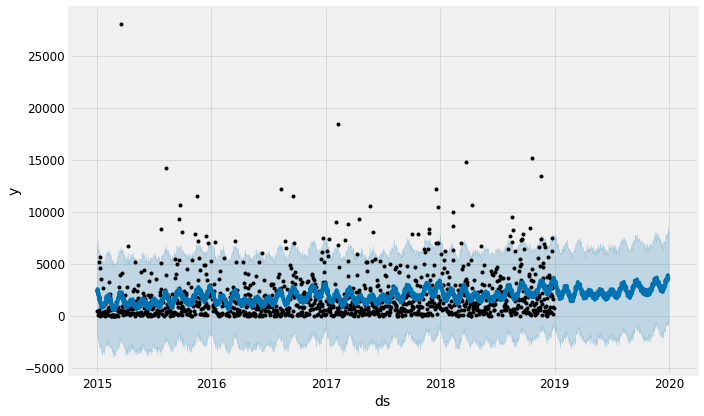

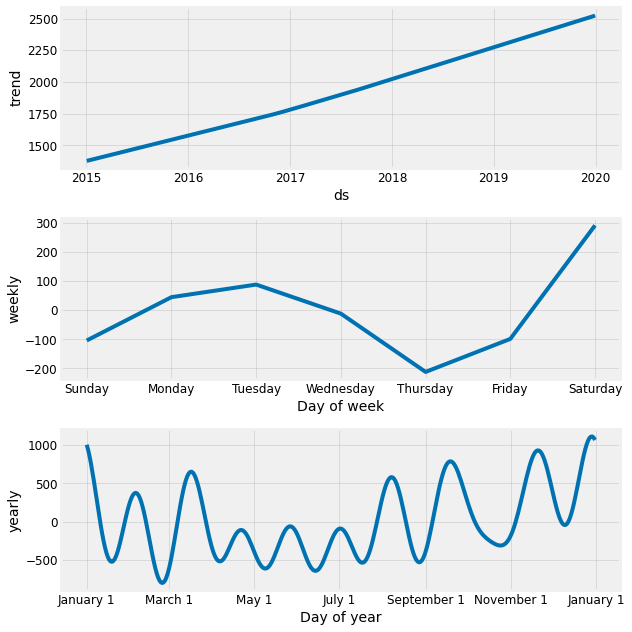

In [15]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [16]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [17]:
metric_df.tail()

,ds,yhat,y
1590,2019-12-26,3339.747123,NaN
1591,2019-12-27,3495.843765,NaN
1592,2019-12-28,3913.617040,NaN
1593,2019-12-29,3529.450025,NaN
1594,2019-12-30,3673.173448,NaN


In [18]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
1225,2018-12-26,3301.472831,814.5940
1226,2018-12-27,3140.005274,177.6360
1227,2018-12-28,3277.108386,1657.3508
1228,2018-12-29,3674.668290,2915.5340
1229,2018-12-30,3269.566647,713.7900


In [19]:
r2_score(metric_df.y, metric_df.yhat)

0.06199295087915124

In [20]:

mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2222.23


1487.092737032995

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_pred - y_true) /np.abs(y_true))) * 100
print('Mean absolute percentage error: ',mean_absolute_percentage_error(df.y,forecast.yhat))

Mean absolute percentage error:  1029.9191238425078


Adding Holiday Parameter 

In [22]:
m = Prophet(interval_width = 0.95)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
m.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [24]:
#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1590,2019-12-26
1591,2019-12-27
1592,2019-12-28
1593,2019-12-29
1594,2019-12-30


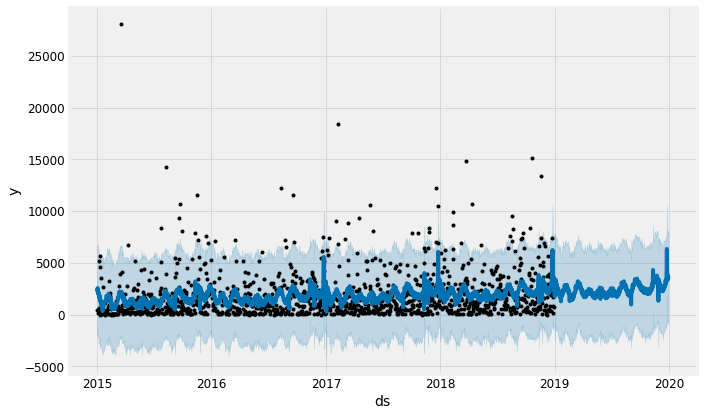

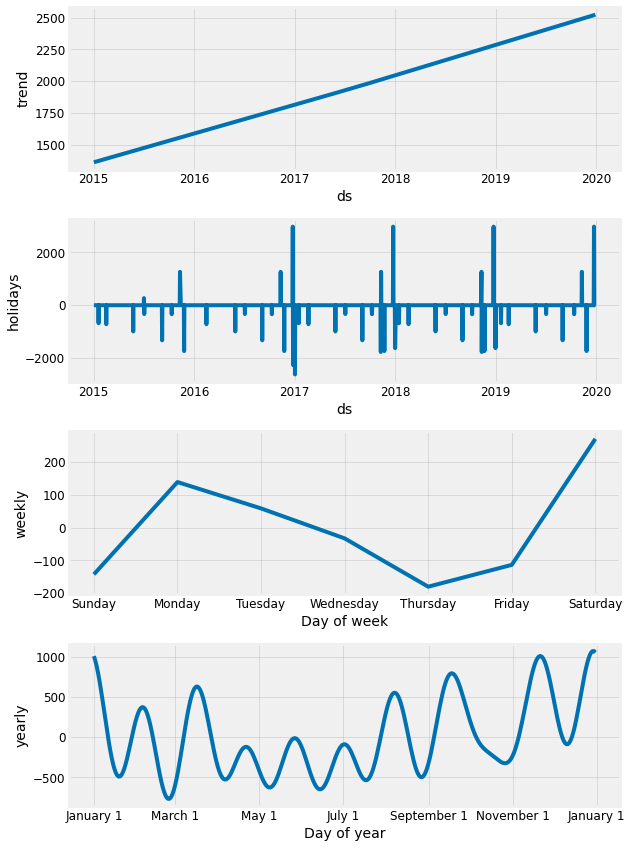

In [25]:
forecast = m.predict(future)
m.plot(forecast)
fig = m.plot_components(forecast)

In [26]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [27]:
metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2207.78


1474.4902765298855

In [28]:
r2_score(metric_df.y, metric_df.yhat)

0.07414514992096499

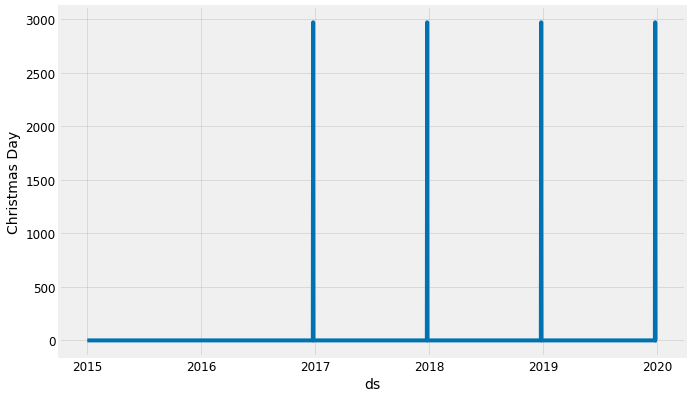

In [29]:
#lets check individual holiday effect.....
plot_forecast_component(m, forecast, 'Christmas Day');

Looking Into Montly Seasonality.....

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


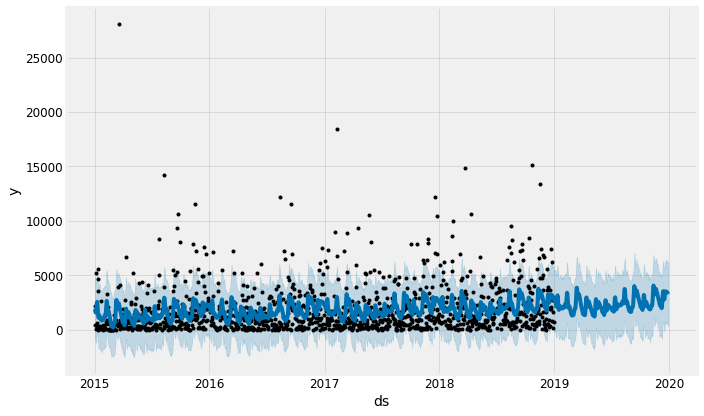

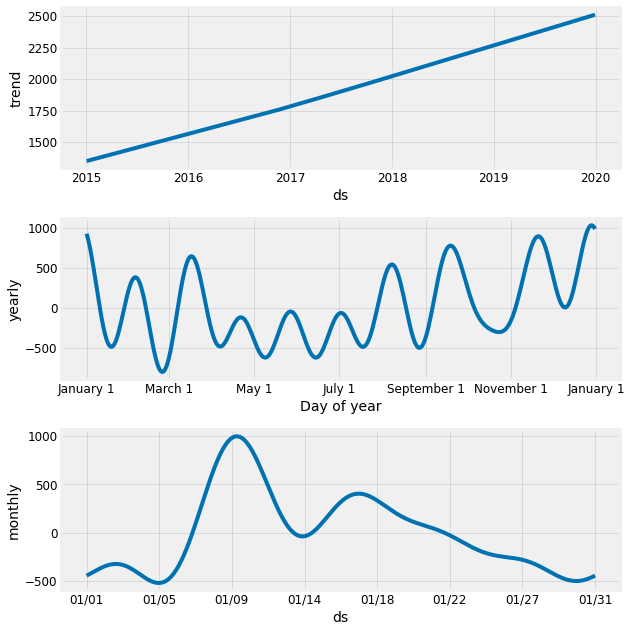

In [30]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()
#forecating
forecast = m.predict(future)
m.plot(forecast)
fig = m.plot_components(forecast)

In [31]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2188.53


1460.332508116937

In [32]:
r2_score(metric_df.y, metric_df.yhat)

0.0902243765100541

Adding Summer Season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


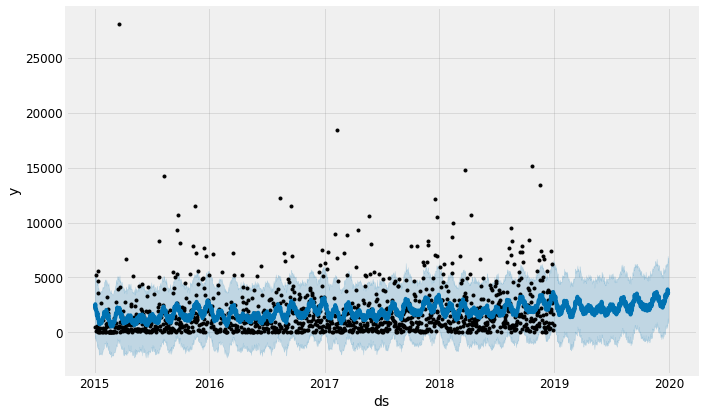

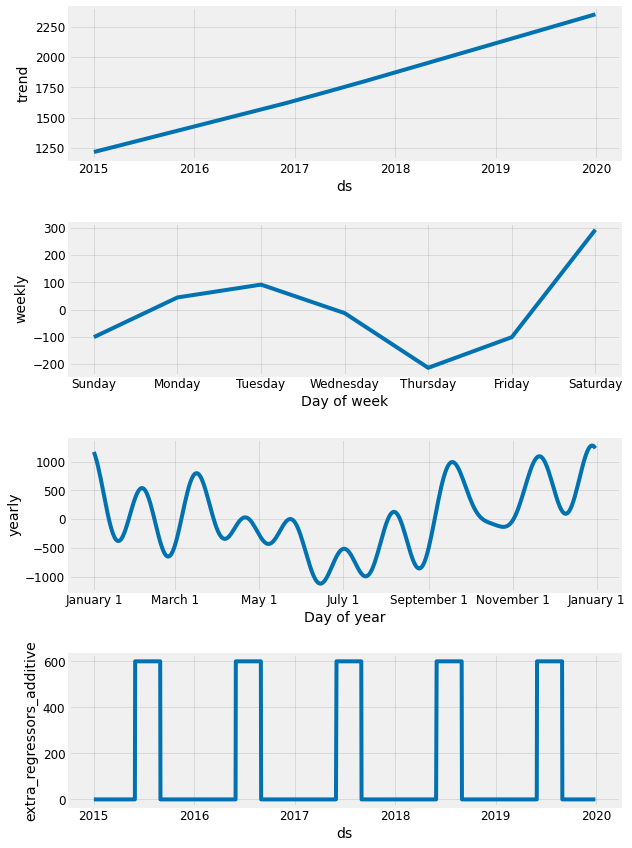

In [35]:
def season(ds):
    date = pd.to_datetime(ds)
    if date.month >= 6 and date.month <= 8:
      return 1
    else:
      return 0

df['season'] = df['ds'].apply(season)

m = Prophet()
m.add_regressor('season')
m.fit(df)

#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

#Addiing Summer Sunday...
future['season'] = future['ds'].apply(season)
forecast = m.predict(future)

#plotting Component....
fig = m.plot(forecast)
fig = m.plot_components(forecast)

In [36]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2221.51


1484.7683234699527

In [37]:
r2_score(metric_df.y, metric_df.yhat)

0.06260137528331344

Adding NFL On Season and Off Season 

In [38]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


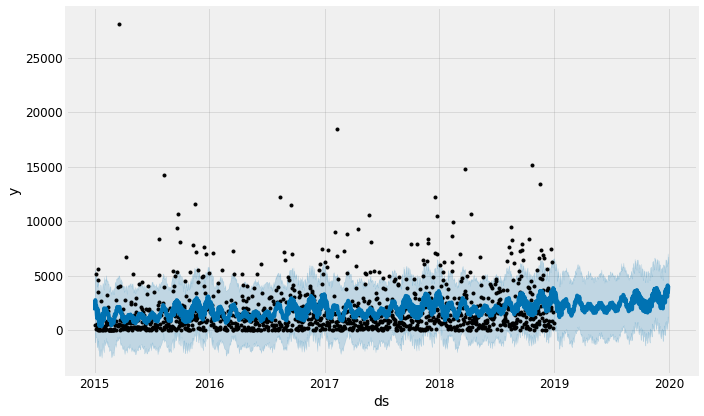

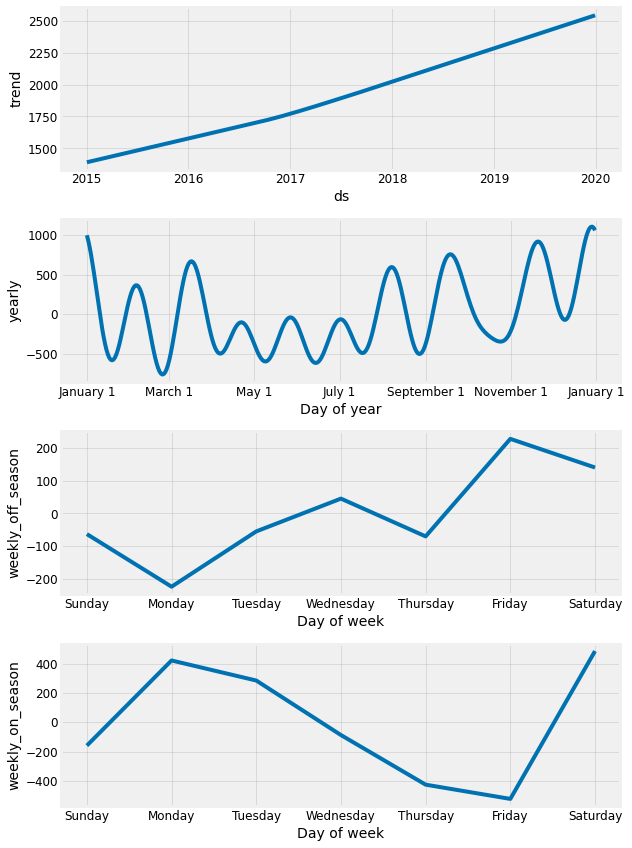

In [39]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.fit(df)
#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
#forecating
forecast = m.predict(future)
m.plot(forecast)

fig = m.plot_components(forecast)

In [40]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2212.13


1481.902466173412

In [41]:
r2_score(metric_df.y, metric_df.yhat)

0.07049572137246574

Adding NFL Sunday..

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


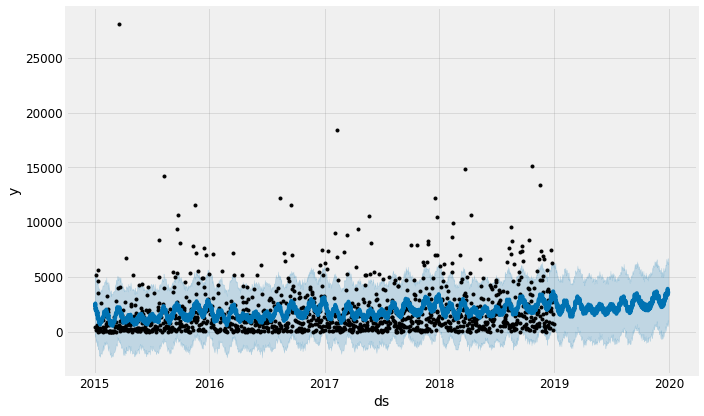

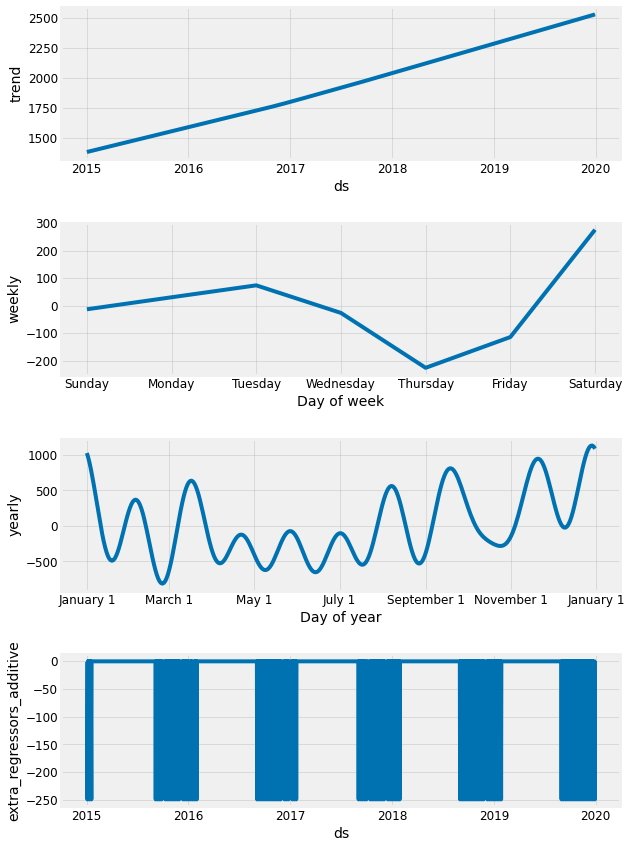

In [42]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

#Addiing NFL  Sunday...
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
forecast = m.predict(future)

#plotting Component....
fig = m.plot(forecast)
fig = m.plot_components(forecast)

In [43]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2221.94


1487.7067381035308

In [44]:
r2_score(metric_df.y, metric_df.yhat)

0.06223253949155905

Adding all the Parameter 

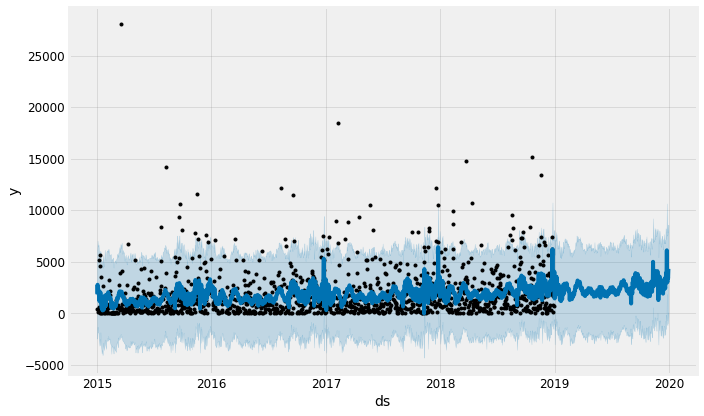

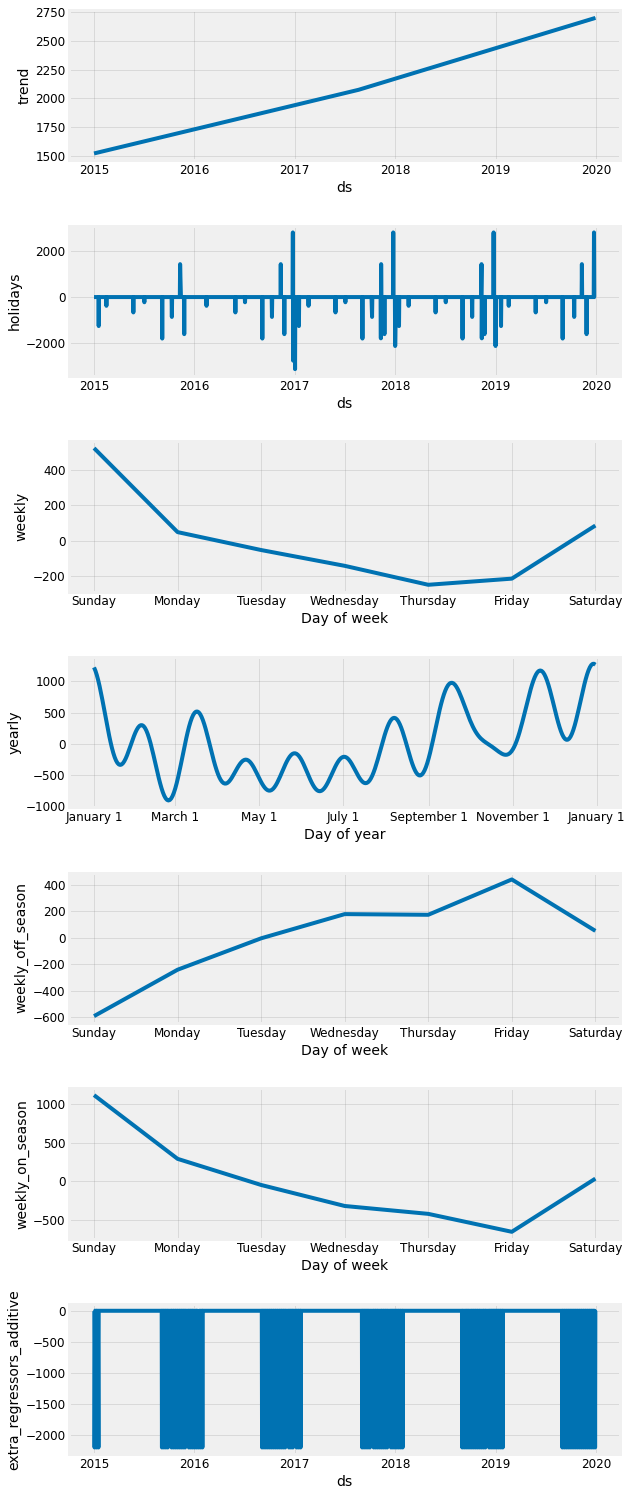

In [45]:
m = Prophet(interval_width=0.95, daily_seasonality=False)
m.add_country_holidays(country_name='US')
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.add_regressor('nfl_sunday')
m.fit(df)

#making prediction of next one year
future = m.make_future_dataframe(periods=365)

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
future.tail()

forecast = m.predict(future)

#plotting the components 
fig = m.plot(forecast)
fig = m.plot_components(forecast)


In [46]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2194.85


1466.695038908796

In [47]:
r2_score(metric_df.y, metric_df.yhat)

0.08496272714861375

In [48]:
def discount(y):
  y = 0.1 * y
  return y


In [49]:
df ['y'] = df['y'].apply(discount)

implmentating forecasting with the use of one more model ARIMA

In [50]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [51]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2.0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3.0,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.20,4.1028
9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.00,15.6332
9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.20,19.3932
9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0.00,13.3200


In [52]:
df.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [53]:
# Extract the data of Office Supplies
office_supplies = df.loc[df['Category'] == 'Office Supplies']

In [54]:
office_supplies['Order Date'].min(), office_supplies['Order Date'].max()

('1/1/2018', '9/9/2018')

In [55]:
office_supplies = office_supplies[['Order Date','Sales']]
office_supplies.head()

,Order Date,Sales
2,12/6/2017,14.620
4,11/10/2016,22.368
6,9/6/2015,7.280
8,9/6/2015,18.504
9,9/6/2015,114.900


In [56]:
office_supplies['Order Date'] = pd.to_datetime(office_supplies['Order Date'])
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

,Order Date,Sales
0,2015-01-03,303.216
1,2015-01-04,119.888
2,2015-01-06,2282.530
3,2015-01-07,25.104
4,2015-01-08,184.200


In [57]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

,Sales
Order Date,
2015-01-03,303.216
2015-01-04,119.888
2015-01-06,2282.530
2015-01-07,25.104
2015-01-08,184.200


In [58]:
office_supplies.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11',
               '2015-01-12', '2015-01-13',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1143, freq=None)

In [59]:

monthly = office_supplies['Sales'].resample('MS').mean() 

In [60]:
monthly

Order Date
2015-01-01     442.918737
2015-02-01     218.343909
2015-03-01     302.427250
2015-04-01     352.387750
2015-05-01     698.627304
2015-06-01     504.030905
2015-07-01     725.808818
2015-08-01     439.934474
2015-09-01     988.528962
2015-10-01     339.506087
2015-11-01     899.779800
2015-12-01     591.031478
2016-01-01     222.152933
2016-02-01     324.928500
2016-03-01     653.024217
2016-04-01     526.138250
2016-05-01     419.191462
2016-06-01     563.081579
2016-07-01     282.943227
2016-08-01     524.227136
2016-09-01     635.736885
2016-10-01     493.848375
2016-11-01     757.300760
2016-12-01     356.563333
2017-01-01     814.272800
2017-02-01     440.148450
2017-03-01     835.973040
2017-04-01     400.754680
2017-05-01     585.299321
2017-06-01     432.782440
2017-07-01     539.620609
2017-08-01     451.287640
2017-09-01     559.121958
2017-10-01     877.068000
2017-11-01     586.027154
2017-12-01    1026.205538
2018-01-01     853.153520
2018-02-01     659.403136
2

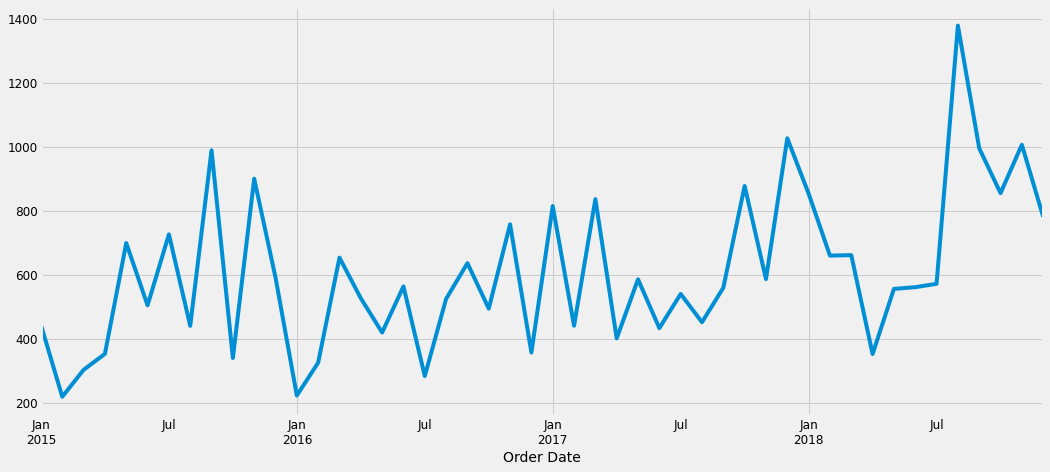

In [61]:
#visulizing time Series Data.....
monthly.plot(figsize = (16, 7))
plt.show()

In [62]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [63]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:744.937423166805
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1255.567897114576
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:501.3497718633212
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:517.094204505464
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1296.9141375066201
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.739509498382
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:705.3863369545267
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2771.338984321551
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:489.89647172929494
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:518.8650531334184
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:348.9629654896911
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:659.99279584349
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1451.3286367128455
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:512.8891324026968
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:498.4220031334332
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1591.2058545230384
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:341.17488799333876
ARIMA(0, 1, 1)x(0, 0, 0,

In [64]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = (1,1,1),
                               seasonal_order = (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0017      0.244     -0.007      0.994      -0.481       0.477
ma.L1         -1.0000      0.277     -3.616      0.000      -1.542      -0.458
ar.S.L12      -0.3191      0.318     -1.003      0.316      -0.943       0.304
sigma2      7.434e+04   3.72e-06      2e+10      0.000    7.43e+04    7.43e+04


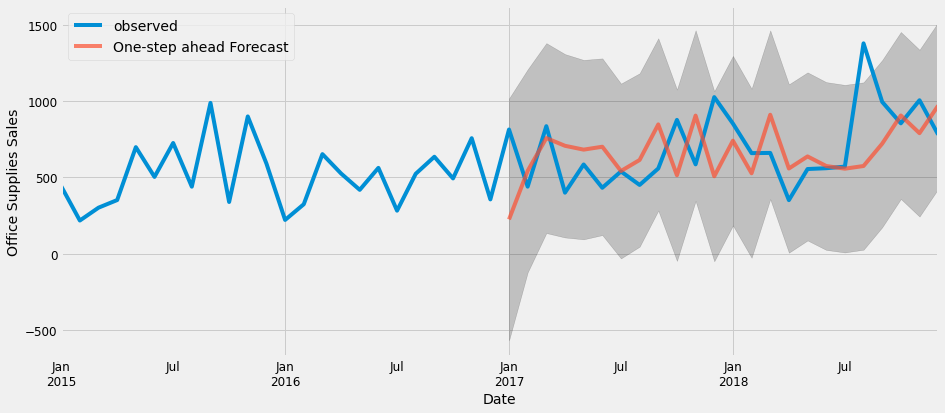

In [65]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

In [66]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 87415.69


In [67]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 295.66
